In [45]:
from google.colab import drive
drive.mount('/content/drive')
import os
from pathlib import Path
RESULTS_FOLDER = Path("/content/drive/MyDrive/Senior Project - Grad/Tests-Programming/DATA_FOR_REVIEW/RESULTS")
kvDelim = '|+|'
elDelim = '||'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# read in data
# {'timestampStart' : {'symResp','appResp','undResp','ovlResp','seeAugResp'}}

resultsDict={}
totObservers = 0
for rf in os.listdir(RESULTS_FOLDER):
  if rf.endswith(".txt"):
    totObservers += 1
    print('tabulating: ', rf)
    rfPath = RESULTS_FOLDER / rf

    with open(rfPath, 'r') as f:
        for line in f:
            #print(line)
            tempDict = {}
            for keyVal in line.split(elDelim):
                kv = keyVal.split(kvDelim)
                if 'timestampStart' in kv[0]:
                    ts = kv[1]
                else:
                    tempDict[kv[0]]=kv[1]
            resultsDict[ts]=tempDict

print(resultsDict)


tabulating:  observerData_eric.txt
tabulating:  observerData_CD.txt
{'1713232334-1713232338': {'symResp': '4', 'appResp': '3', 'undResp': '3', 'ovlResp': '3', 'seeAugResp': 'True\n'}, '1713232480-1713232505': {'symResp': '4', 'appResp': '2', 'undResp': '3', 'ovlResp': '2', 'seeAugResp': 'True\n'}, '1713232517-1713232521': {'symResp': '4', 'appResp': '5', 'undResp': '5', 'ovlResp': '4', 'seeAugResp': 'False\n'}, '1713386703-1713386718': {'symResp': '5', 'appResp': '5', 'undResp': '5', 'ovlResp': '5', 'seeAugResp': 'True\n'}, '1713386802-1713386811': {'symResp': '4', 'appResp': '5', 'undResp': '5', 'ovlResp': '5', 'seeAugResp': 'True\n'}, '1713386600-1713386608': {'symResp': '5', 'appResp': '4', 'undResp': '3', 'ovlResp': '4', 'seeAugResp': 'False\n'}, '1713386651-1713386660': {'symResp': '5', 'appResp': '5', 'undResp': '5', 'ovlResp': '5', 'seeAugResp': 'True\n'}, '1713386670-1713386676': {'symResp': '5', 'appResp': '5', 'undResp': '5', 'ovlResp': '5', 'seeAugResp': 'False\n'}, '1713386

In [47]:
# calculate results
totAug = 0
totSymAug = totAppAug = totUndAug = totOvlAug = 0
totBas = 0
totSymBas = totAppBas = totUndBas = totOvlBas = 0

for each in resultsDict.keys():
  try:
    #print([resultsDict[each]['seeAugResp']])
    if 'True' in resultsDict[each]['seeAugResp']: # saw augmented response
      totSymAug = totSymAug + int(resultsDict[each]['symResp'])
      totAppAug = totAppAug + int(resultsDict[each]['appResp'])
      totUndAug = totUndAug + int(resultsDict[each]['undResp'])
      totOvlAug = totOvlAug + int(resultsDict[each]['ovlResp'])
      totAug += 1
    else: # saw baseline response
      totSymBas = totSymBas + int(resultsDict[each]['symResp'])
      totAppBas = totAppBas + int(resultsDict[each]['appResp'])
      totUndBas = totUndBas + int(resultsDict[each]['undResp'])
      totOvlBas = totOvlBas + int(resultsDict[each]['ovlResp'])
      totBas += 1
  except Exception as e:
    print(e)
    #print("problem with", resultsDict[each])
    pass

print("total number of responses = ", str(totAug+totBas))
if len(resultsDict.keys()) != (totAug+totBas):
  print("total number of keys in resultsDict = ", str(len(resultsDict.keys())))

print("averages;\n(Baseline versus Augmented):")
print(f'sym {totSymBas/totBas:.2f}', f'sym {totSymAug/totAug:.2f}')
print(f'app {totAppBas/totBas:.2f}', f'app {totAppAug/totAug:.2f}')
print(f'und {totUndBas/totBas:.2f}', f'und {totUndAug/totAug:.2f}')
print(f'ovl {totOvlBas/totBas:.2f}', f'ovl {totOvlAug/totAug:.2f}')



total number of responses =  29
averages;
(Baseline versus Augmented):
sym 3.88 sym 4.17
app 4.71 app 3.92
und 4.76 und 4.17
ovl 3.94 ovl 4.08


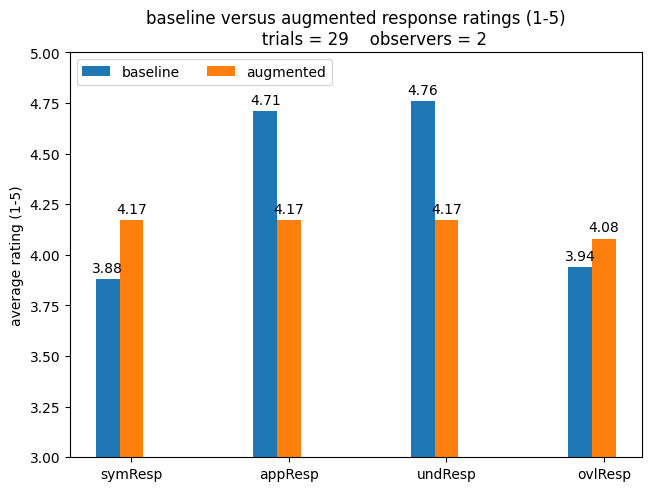

In [50]:
import matplotlib.pyplot as plt
import numpy as np

symBas = round(totSymBas/totBas, 2)
appBas = round(totAppBas/totBas, 2)
undBas = round(totUndBas/totBas, 2)
ovlBas = round(totOvlBas/totBas, 2)

symAug = round(totSymAug/totAug, 2)
appAug = round(totAppAug/totAug, 2)
undAug = round(totUndAug/totAug, 2)
ovlAug = round(totOvlAug/totAug, 2)

augVbas = ('baseline','augmented')
responseRatings = {
    'symResp': (symBas, symAug),
    'appResp': (appBas, appAug),
    'undResp': (undBas, undAug),
    'ovlResp': (ovlBas, ovlAug)
}
augVbas = ('symResp','appResp','undResp','ovlResp')
responseRatings = {
    'baseline': (symBas, appBas, undBas, ovlBas),
    'augmented': (symAug, symAug, undAug, ovlAug)
}

x = np.arange(len(augVbas))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in responseRatings.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('average rating (1-5)')
ax.set_title(f'baseline versus augmented response ratings (1-5)\n\
       trials = {totAug+totBas}    observers = {totObservers}')
ax.set_xticks(x + width, augVbas)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(3, 5)

plt.show()